In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/support/account (3).csv
/kaggle/input/czech-bank-dataset/account.csv
/kaggle/input/czech-bank-dataset/district.csv
/kaggle/input/czech-bank-dataset/trans.csv


In [2]:
account = pd.read_csv('/kaggle/input/support/account (3).csv')
distr= pd.read_csv('/kaggle/input/czech-bank-dataset/district.csv')
trans = pd.read_csv('/kaggle/input/czech-bank-dataset/trans.csv')

/tmp/ipykernel_32/597188455.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('/kaggle/input/czech-bank-dataset/trans.csv')


# Look at the info summary

In [3]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


In [4]:
distr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   873206 non-null   object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      574439 non-null   object 
 8   partner_bank     273508 non-null   object 
 9   partner_account  295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


# Look at the head summary

In [6]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [7]:
distr.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.0
2,3,Beroun,central Bohemia,75232,8980.0,2.21,2813.0
3,4,Kladno,central Bohemia,149893,9753.0,5.05,NaN
4,5,Kolin,central Bohemia,95616,9307.0,4.43,NaN


In [8]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,NaN,NaN


# Check for the unique

In [9]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [10]:
distr.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [11]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

# Check for duplicates

In [12]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [13]:
distr[distr.duplicated()]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes


In [14]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


In [15]:
account['account_open_date'] = pd.to_datetime(account['account_open_date'])

In [16]:
trans['date'] = pd.to_datetime(trans['date'])

In [17]:
account.dtypes

account_id                    int64
district_id                   int64
frequency                    object
account_open_date    datetime64[ns]
client_id                     int64
dtype: object

In [18]:
trans.dtypes

trans_id                    int64
account_id                  int64
date               datetime64[ns]
type                       object
operation_type             object
amount                    float64
balance                   float64
description                object
partner_bank               object
partner_account           float64
dtype: object

In [19]:
distr['region'] = distr['region'].str.upper()
distr['district_name'] =distr['district_name'].str.upper()

In [20]:
distr.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,HL.M. PRAHA,PRAGUE,1204953,12541.0,0.43,99107.0
1,2,BENESOV,CENTRAL BOHEMIA,88884,NaN,NaN,2674.0
2,3,BEROUN,CENTRAL BOHEMIA,75232,8980.0,2.21,2813.0
3,4,KLADNO,CENTRAL BOHEMIA,149893,9753.0,5.05,NaN
4,5,KOLIN,CENTRAL BOHEMIA,95616,9307.0,4.43,NaN


In [21]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

In [22]:
distr.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
cols_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

In [25]:
it_ime = IterativeImputer(max_value = distr[cols_to_impute].max(),min_value = distr[cols_to_impute].min())


In [26]:
col_impute = it_ime.fit_transform(distr[cols_to_impute])


In [27]:
distr[cols_to_impute] =col_impute

In [28]:
distr.isna().sum()

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

# Check for missing data

In [29]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

In [30]:
numeric_col= trans.select_dtypes(include = 'number').columns
cat_col= trans.select_dtypes(exclude = 'number').columns

In [31]:
trans[numeric_col] = trans[numeric_col].fillna(-999)
trans[cat_col] = trans[cat_col].fillna('UNKNOWN')

trans.info

<bound method DataFrame.info of          trans_id  account_id       date    type  operation_type  amount  \
0          695247        2378 1993-01-01  CREDIT  CREDIT IN CASH   700.0   
1          171812         576 1993-01-01  CREDIT  CREDIT IN CASH   900.0   
2          207264         704 1993-01-01  CREDIT  CREDIT IN CASH  1000.0   
3         1117247        3818 1993-01-01  CREDIT  CREDIT IN CASH   600.0   
4          579373        1972 1993-01-02  CREDIT  CREDIT IN CASH   400.0   
...           ...         ...        ...     ...             ...     ...   
1056315   3626622        2906 1998-12-31  CREDIT         UNKNOWN    62.3   
1056316   3627616        2935 1998-12-31  CREDIT         UNKNOWN    81.3   
1056317   3625403        2869 1998-12-31  CREDIT         UNKNOWN    60.2   
1056318   3626683        2907 1998-12-31  CREDIT         UNKNOWN   107.5   
1056319   3626540        2902 1998-12-31  CREDIT         UNKNOWN   164.1   

         balance      description partner_bank  partner

# Check for outliers

In [32]:
distr.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000000,7.600000e+01,76.000000,76.000000,76.000000
mean,38.500000,1.336920e+05,8983.707247,3.864003,5054.492038
std,22.083176,1.378127e+05,740.959314,1.721597,11392.279917
min,1.000000,4.282100e+04,8110.000000,0.430000,888.000000
25%,19.750000,8.472500e+04,8533.750000,2.650000,1918.454646
50%,38.500000,1.083910e+05,8792.984750,3.761936,2864.000000
75%,57.250000,1.382770e+05,9280.750000,4.570000,4562.413240
max,76.000000,1.204953e+06,12541.000000,9.400000,99107.000000


array([[<Axes: title={'center': 'district_id'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'average_salary'}>,
        <Axes: title={'center': 'unemployment_rate'}>],
       [<Axes: title={'center': 'num_committed_crimes'}>, <Axes: >]],
      dtype=object)

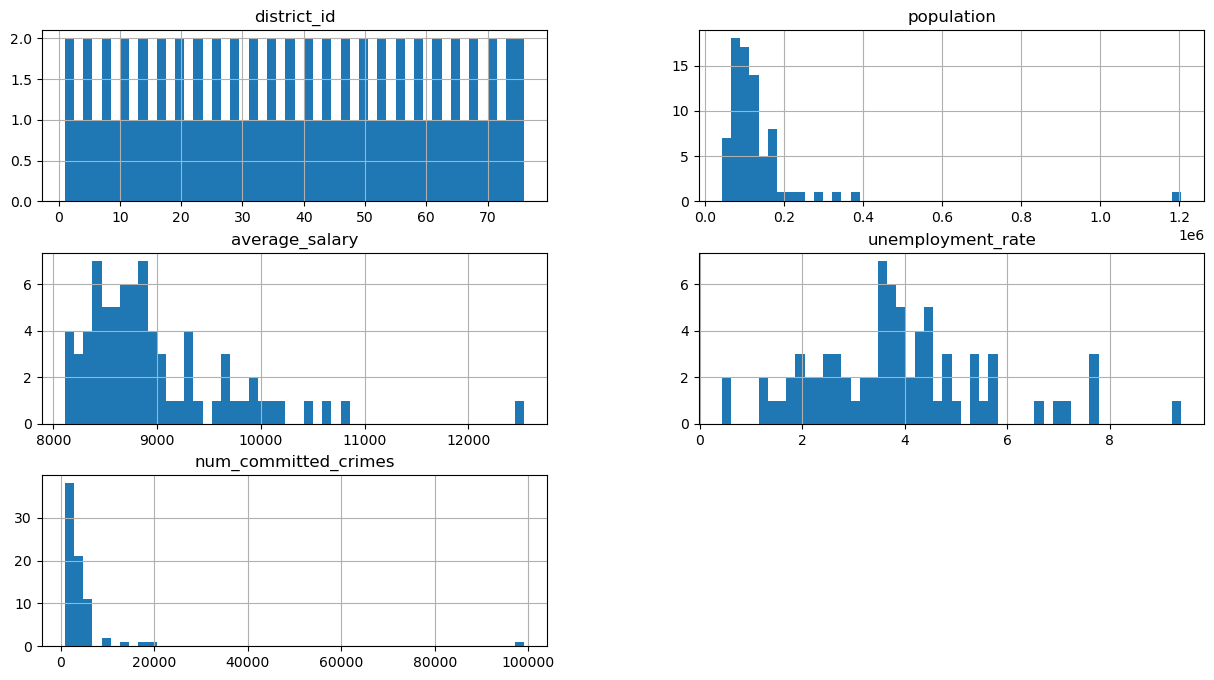

In [33]:
distr[['district_id','population','average_salary','unemployment_rate','num_committed_crimes']].hist(bins = 50,figsize= (15,8))

# Explore the outliers in the dataset

In [34]:
distr.nlargest(1, columns = 'population')

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,HL.M. PRAHA,PRAGUE,1204953.0,12541.0,0.43,99107.0


In [35]:
trans.describe()

,trans_id,account_id,amount,balance,partner_account
count,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06
mean,1.335311e+06,2.936867e+03,5.924146e+03,3.851833e+04,1.277068e+07
std,1.227487e+06,2.477345e+03,9.522735e+03,2.211787e+04,2.613658e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,-4.112570e+04,-9.990000e+02
25%,4.302628e+05,1.204000e+03,1.359000e+02,2.240250e+04,-9.990000e+02
50%,8.585065e+05,2.434000e+03,2.100000e+03,3.314340e+04,-9.990000e+02
75%,2.060979e+06,3.660000e+03,6.800000e+03,4.960362e+04,3.410566e+06
max,3.682987e+06,1.138200e+04,8.740000e+04,2.096370e+05,9.999420e+07


array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'balance'}>]], dtype=object)

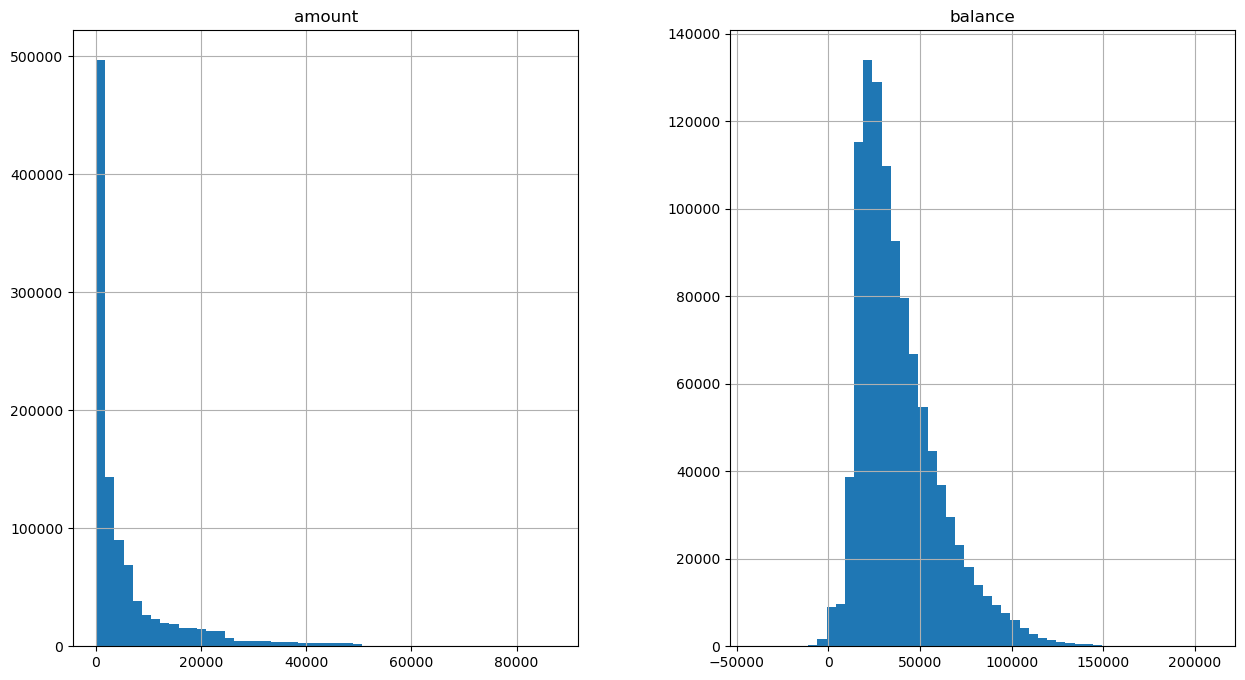

In [36]:
trans[['amount', 'balance']].hist(bins=50 , figsize=(15,8))


#  Explore the outliers in the dataset

In [37]:
trans[trans['amount'] > 60000 ]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
422,1313408,4484,1993-02-23,DEBIT,WITHDRAWAL IN CASH,62100.0,41183.0,UNKNOWN,UNKNOWN,-999.0
1287,1450519,4937,1993-04-04,DEBIT,WITHDRAWAL IN CASH,60500.0,74071.2,UNKNOWN,UNKNOWN,-999.0
3565,303136,1032,1993-06-05,CREDIT,COLLECTION FROM ANOTHER BANK,74648.0,112843.8,UNKNOWN,GH,43027007.0
3635,655858,2242,1993-06-06,CREDIT,COLLECTION FROM ANOTHER BANK,65240.0,126832.2,UNKNOWN,CD,7862908.0
3783,894506,3050,1993-06-08,CREDIT,COLLECTION FROM ANOTHER BANK,62168.0,73568.0,UNKNOWN,GH,69871258.0
...,...,...,...,...,...,...,...,...,...,...
1049226,602639,2051,1998-12-21,DEBIT,WITHDRAWAL IN CASH,62000.0,71187.7,UNKNOWN,UNKNOWN,-999.0
1049504,302367,1029,1998-12-22,DEBIT,WITHDRAWAL IN CASH,63800.0,57501.1,UNKNOWN,UNKNOWN,-999.0
1049791,335369,1139,1998-12-23,DEBIT,WITHDRAWAL IN CASH,62600.0,90537.9,UNKNOWN,UNKNOWN,-999.0
1050834,414144,1407,1998-12-26,DEBIT,WITHDRAWAL IN CASH,62700.0,73836.1,UNKNOWN,UNKNOWN,-999.0


In [38]:
trans.loc[trans['amount'] > 60000 ,'operation_type'].value_counts()

WITHDRAWAL IN CASH              837
COLLECTION FROM ANOTHER BANK    738
Name: operation_type, dtype: int64

In [39]:
trans[trans['balance'] > 150000]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
2832,695256,2378,1993-05-19,CREDIT,CREDIT IN CASH,43637.0,151483.0,UNKNOWN,UNKNOWN,-999.0
2872,576769,1965,1993-05-21,CREDIT,CREDIT IN CASH,33711.0,156483.5,UNKNOWN,UNKNOWN,-999.0
3037,1100776,3760,1993-05-29,CREDIT,CREDIT IN CASH,38405.0,169292.1,UNKNOWN,UNKNOWN,-999.0
7797,637133,2176,1993-08-02,CREDIT,CREDIT IN CASH,47024.0,193909.9,UNKNOWN,UNKNOWN,-999.0
16229,615555,2099,1993-10-18,CREDIT,CREDIT IN CASH,36684.0,184168.4,UNKNOWN,UNKNOWN,-999.0
...,...,...,...,...,...,...,...,...,...,...
1050134,3317727,11021,1998-12-24,CREDIT,CREDIT IN CASH,42890.0,160348.0,UNKNOWN,UNKNOWN,-999.0
1050758,2675921,8856,1998-12-26,CREDIT,CREDIT IN CASH,46170.0,192662.5,UNKNOWN,UNKNOWN,-999.0
1050912,3215715,10670,1998-12-27,CREDIT,CREDIT IN CASH,44890.0,173945.9,UNKNOWN,UNKNOWN,-999.0
1051009,157025,525,1998-12-27,CREDIT,CREDIT IN CASH,46726.0,158444.3,UNKNOWN,UNKNOWN,-999.0


In [40]:
trans.loc[trans['balance'] > 150000 ,'operation_type'].value_counts()

CREDIT IN CASH                  312
WITHDRAWAL IN CASH               18
COLLECTION FROM ANOTHER BANK     14
UNKNOWN                           4
REMITTANCE TO ANOTHER BANK        4
CREDIT CARD WITHDRAWAL            2
Name: operation_type, dtype: int64

# Merge (left join) account and district

In [41]:
account_district= pd.merge(account,distr, on='district_id', how= 'left')

In [42]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4460 non-null   float64       
 8   average_salary        4460 non-null   float64       
 9   unemployment_rate     4460 non-null   float64       
 10  num_committed_crimes  4460 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


In [43]:
msk = account_district.isna().sum(axis=1) > 0
account_district[msk]

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
5,1972,77,MONTHLY STATEMENTS,1993-01-02,2397,NaN,NaN,NaN,NaN,NaN,NaN
77,1000,77,MONTHLY STATEMENTS,1993-01-25,1204,NaN,NaN,NaN,NaN,NaN,NaN
308,299,77,MONTHLY STATEMENTS,1993-04-05,364,NaN,NaN,NaN,NaN,NaN,NaN
322,8321,77,MONTHLY STATEMENTS,1993-04-12,10275,NaN,NaN,NaN,NaN,NaN,NaN
394,551,77,MONTHLY STATEMENTS,1993-05-07,664,NaN,NaN,NaN,NaN,NaN,NaN
537,5228,77,STATEMENTS AFTER TRANSACTION,1993-06-23,6317,NaN,NaN,NaN,NaN,NaN,NaN
574,368,77,MONTHLY STATEMENTS,1993-07-06,448,NaN,NaN,NaN,NaN,NaN,NaN
790,3157,77,MONTHLY STATEMENTS,1993-09-10,3817,NaN,NaN,NaN,NaN,NaN,NaN
817,857,77,MONTHLY STATEMENTS,1993-09-16,1032,NaN,NaN,NaN,NaN,NaN,NaN
832,153,77,MONTHLY STATEMENTS,1993-09-19,185,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imp_mean =  SimpleImputer(strategy = 'mean')

In [46]:
col_impute = ['population','average_salary','unemployment_rate','num_committed_crimes']
account_district[col_impute] = imp_mean.fit_transform(account_district[col_impute])

In [47]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4500 non-null   float64       
 8   average_salary        4500 non-null   float64       
 9   unemployment_rate     4500 non-null   float64       
 10  num_committed_crimes  4500 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


In [48]:
account_district = account_district.fillna('UNKNOWN')
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4500 non-null   object        
 6   region                4500 non-null   object        
 7   population            4500 non-null   float64       
 8   average_salary        4500 non-null   float64       
 9   unemployment_rate     4500 non-null   float64       
 10  num_committed_crimes  4500 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


In [49]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_id         1056320 non-null  int64         
 1   account_id       1056320 non-null  int64         
 2   date             1056320 non-null  datetime64[ns]
 3   type             1056320 non-null  object        
 4   operation_type   1056320 non-null  object        
 5   amount           1056320 non-null  float64       
 6   balance          1056320 non-null  float64       
 7   description      1056320 non-null  object        
 8   partner_bank     1056320 non-null  object        
 9   partner_account  1056320 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


# Dataset combined from the three DataFrames account, district, trans

In [50]:
all_data = pd.merge(account_district, trans ,on = 'account_id', how='left')

In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   account_id            1056320 non-null  int64         
 1   district_id           1056320 non-null  int64         
 2   frequency             1056320 non-null  object        
 3   account_open_date     1056320 non-null  datetime64[ns]
 4   client_id             1056320 non-null  int64         
 5   district_name         1056320 non-null  object        
 6   region                1056320 non-null  object        
 7   population            1056320 non-null  float64       
 8   average_salary        1056320 non-null  float64       
 9   unemployment_rate     1056320 non-null  float64       
 10  num_committed_crimes  1056320 non-null  float64       
 11  trans_id              1056320 non-null  int64         
 12  date                  1056320 non-null  da

#  Create a new column account_open_year as new column of year

In [52]:
all_data['account_open_year'] = all_data['account_open_date'].dt.year

In [53]:
all_data['account_open_year'].head()

0    1993
1    1993
2    1993
3    1993
4    1993
Name: account_open_year, dtype: int64